<a href="https://colab.research.google.com/github/SonDongBin/python-file/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


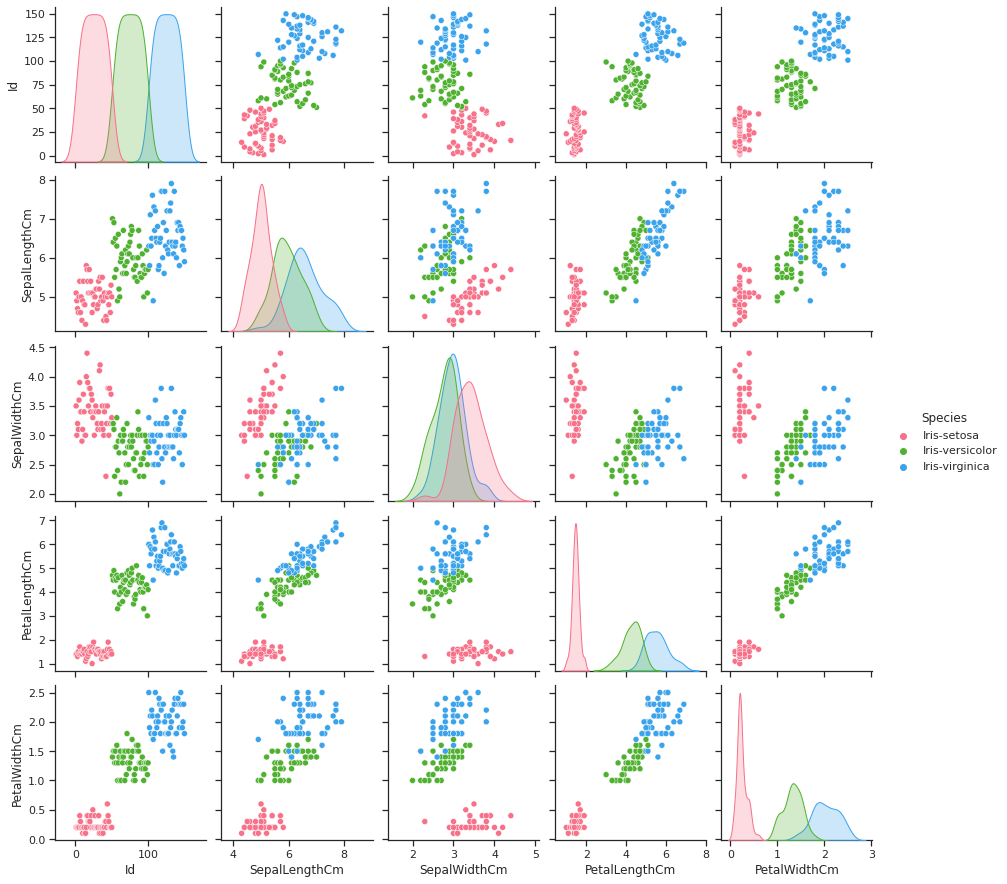

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", \
                           filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


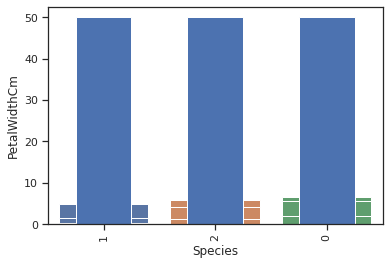

In [2]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)
sns.barplot(data['Species'], data['SepalLengthCm'], ci=None)
sns.barplot(data['Species'], data['PetalLengthCm'], ci=None)
sns.barplot(data['Species'], data['PetalWidthCm'], ci=None)
# 데이터 중 각 품종이 몇개 있는지 확인
data['Species'].value_counts().plot(kind='bar')
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2로 인코딩 진행
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y = data['Species'].values
print(data_X[:5])
print(data_y[:5])

In [4]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [5]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
from sklearn import tree
text_representation = tree.export_text(dtclf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 1



In [7]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

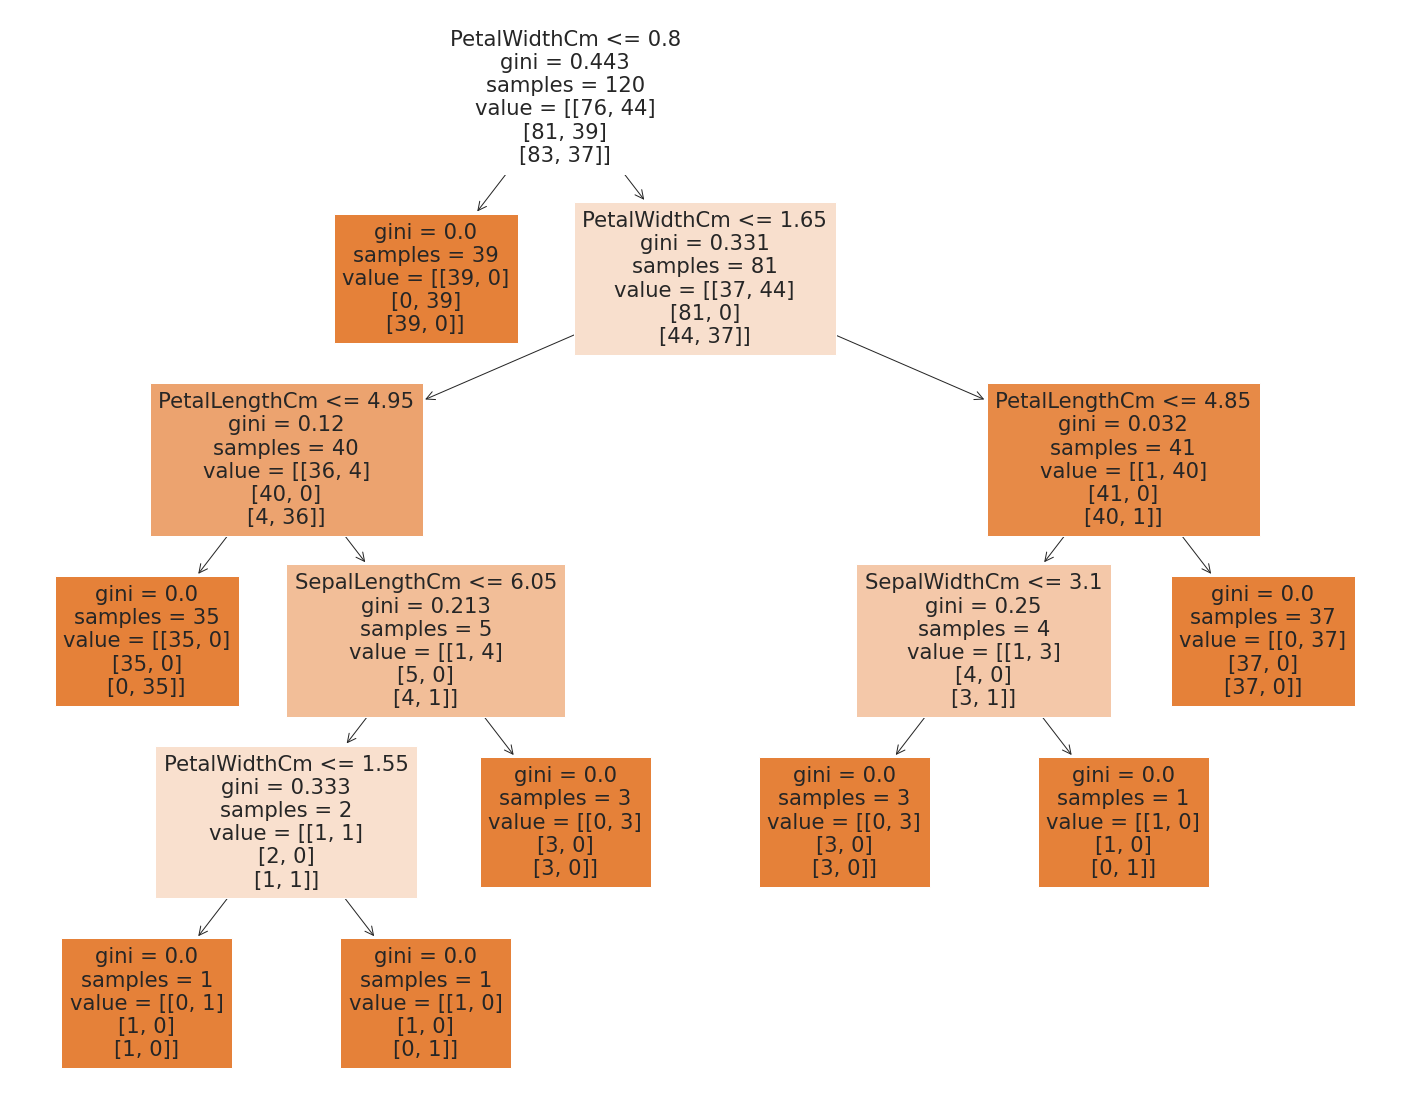

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtclf, 
                   feature_names=data.columns[1:5],
                   class_names=data.Species.unique(),
                   filled=True)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 2s 8ms/step - loss: 2.3772 - accuracy: 0.0833 - val_loss: 2.6261 - val_accuracy: 0.1667
Epoch 2/200
120/120 [==============================] - 1s 6ms/step - loss: 1.8399 - accuracy: 0.2417 - val_loss: 1.9847 - val_accuracy: 0.1667
Epoch 3/200
120/120 [==============================] - 1s 4ms/step - loss: 1.4036 - accuracy: 0.3333 - val_loss: 1.4253 - val_accuracy: 0.2333
Epoch 4/200
120/120 [==============================] - 1s 6ms/step - loss: 1.1250 - accuracy: 0.3833 - val_loss: 1.0976 - val_accuracy: 0.4000
Epoch 5/200
120/120 [==============================] - 1s 4ms/step - loss: 1.0127 - accuracy: 0.3250 - val_loss: 0.9954 - val_accuracy: 0.4333
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 0.9531 - accuracy: 0.3417 - val_loss: 0.9136 - val_accuracy: 0.4333
Epoch 7/200
120/120 [==============================] - 0s 3ms/step - loss: 0.9091 - accuracy: 0.4583 - val_loss: 0.8784 - val_accuracy: 0.5000

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


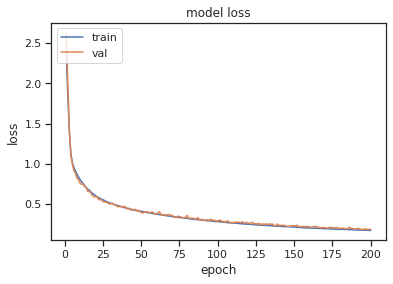

In [11]:
print(type(history.history))
print(history.history.keys())
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
print(model.evaluate(X_test, y_test))
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 286ms/step - loss: 0.1887 - accuracy: 0.9667
[0.18868771195411682, 0.9666666388511658]
1/1 [==============================] - 0s 25ms/step - loss: 0.1887 - accuracy: 0.9667

 테스트 정확도: 0.9667
